# Backpropagation

This first lecture talks about backpropagation and other topics relating to training neural networks.

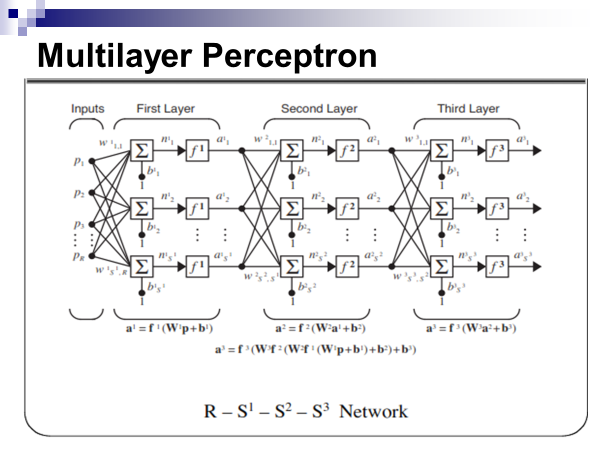

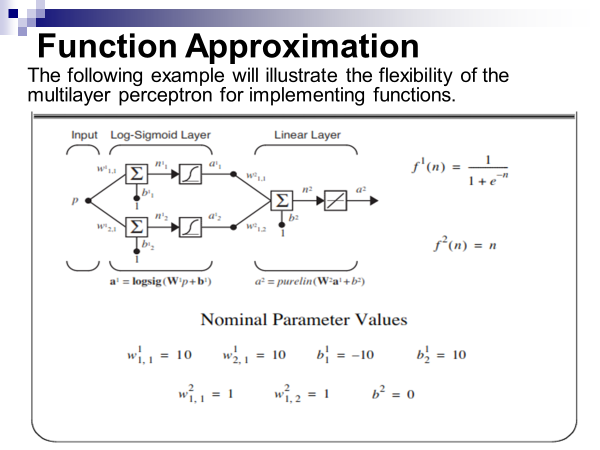

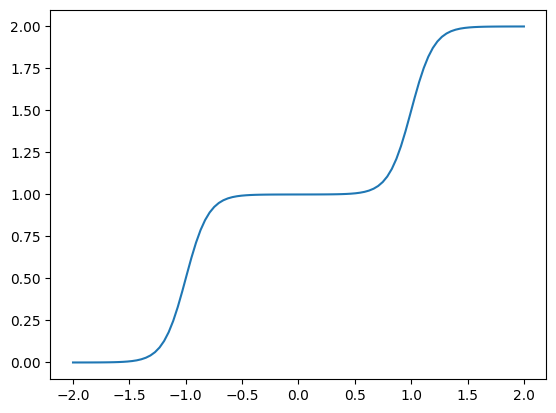

In [16]:
# Implementing the first example
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(n):
    return 1/(1 + np.exp(-n))

def network_example1(input):
    w1 = np.array([[10], [10]])
    b1 = np.array([[-10], [10]])
    w2 = np.array([[1, 1]])
    b2 = np.array([[0]])
    
    a1 = sigmoid(w1@input + b1)
    a2 = w2@a1 + b2
    
    return a2

input = np.linspace(-2, 2, 100).reshape(1, -1)
output = network_example1(input)

plt.plot(input[0], output[0])
plt.show()